# Project 1 - Model Testing and Evaluation

This notebook loads pre-trained models and evaluates them on the test set.

### Cell 1: Imports


In [9]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


### Cell 2: Load Tip Prediction Models

In [10]:
print("="*80)
print("LOADING TIP PREDICTION MODELS")
print("="*80)

# Load trained models
lr_tip = joblib.load('models/tip_prediction/linear_regression.pkl')
lasso_tip = joblib.load('models/tip_prediction/lasso_regression.pkl')

# Load train-test split
X_train, X_test, y_train, y_test = joblib.load('data/splits/tip_train_test.pkl')

print(f"✓ Linear Regression model loaded")
print(f"✓ Lasso Regression model loaded")
print(f"✓ Test set loaded: {X_test.shape[0]} samples")

LOADING TIP PREDICTION MODELS
✓ Linear Regression model loaded
✓ Lasso Regression model loaded
✓ Test set loaded: 1893 samples


### Cell 3: Evaluate Tip Models

In [11]:
print("="*80)
print("TIP PREDICTION - MODEL EVALUATION ON TEST SET")
print("="*80)

# Linear Regression predictions
y_pred_lr = lr_tip.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("\nLinear Regression (No Regularization):")
print(f"  R² Score: {r2_lr:.4f}")
print(f"  RMSE: ${rmse_lr:.2f}")
print(f"  MAE: ${mae_lr:.2f}")

# Lasso Regression predictions
y_pred_lasso = lasso_tip.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("\nLasso Regression (With Regularization):")
print(f"  Best Alpha: {lasso_tip.named_steps['regressor'].alpha}")
print(f"  R² Score: {r2_lasso:.4f}")
print(f"  RMSE: ${rmse_lasso:.2f}")
print(f"  MAE: ${mae_lasso:.2f}")

# Comparison
print("\n" + "="*80)
print("COMPARISON")
print("="*80)
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression'],
    'R²': [r2_lr, r2_lasso],
    'RMSE': [rmse_lr, rmse_lasso],
    'MAE': [mae_lr, mae_lasso]
})
print(comparison_df.to_string(index=False))

TIP PREDICTION - MODEL EVALUATION ON TEST SET

Linear Regression (No Regularization):
  R² Score: 0.5629
  RMSE: $2.54
  MAE: $1.51

Lasso Regression (With Regularization):
  Best Alpha: 0.01
  R² Score: 0.5645
  RMSE: $2.54
  MAE: $1.50

COMPARISON
            Model       R²     RMSE      MAE
Linear Regression 0.562914 2.543286 1.507094
 Lasso Regression 0.564457 2.538795 1.500562


### Cell 4: Visualize Tip Predictions

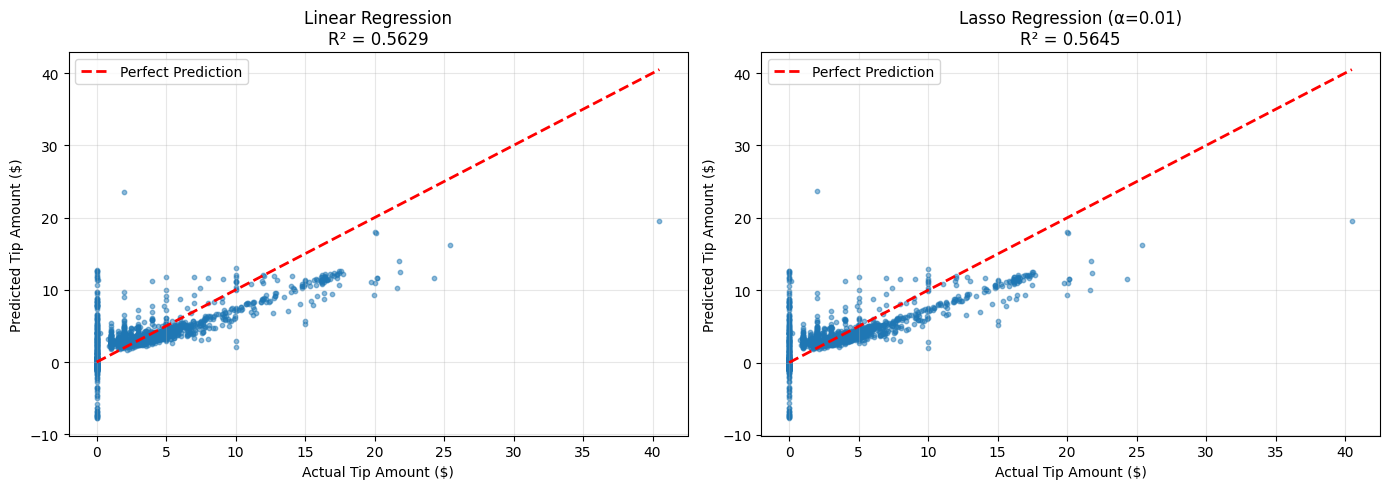

✓ Figure saved: results/figures/tip_prediction/test_predictions.png


In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression
axes[0].scatter(y_test, y_pred_lr, alpha=0.5, s=10)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Tip Amount ($)')
axes[0].set_ylabel('Predicted Tip Amount ($)')
axes[0].set_title(f'Linear Regression\nR² = {r2_lr:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Lasso Regression
axes[1].scatter(y_test, y_pred_lasso, alpha=0.5, s=10)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Tip Amount ($)')
axes[1].set_ylabel('Predicted Tip Amount ($)')
axes[1].set_title(f'Lasso Regression (α={lasso_tip.named_steps["regressor"].alpha})\nR² = {r2_lasso:.4f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/figures/tip_prediction/test_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure saved: results/figures/tip_prediction/test_predictions.png")

### Cell 5: Prediction Residuals

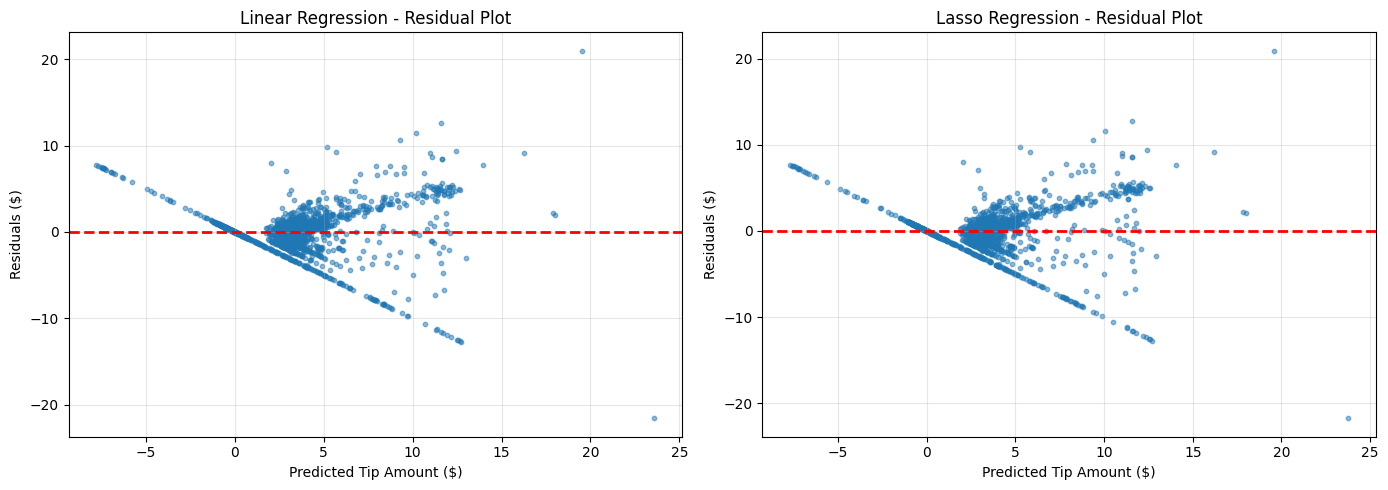

✓ Figure saved: results/figures/tip_prediction/test_residuals.png


In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression residuals
residuals_lr = y_test - y_pred_lr
axes[0].scatter(y_pred_lr, residuals_lr, alpha=0.5, s=10)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Tip Amount ($)')
axes[0].set_ylabel('Residuals ($)')
axes[0].set_title('Linear Regression - Residual Plot')
axes[0].grid(True, alpha=0.3)

# Lasso Regression residuals
residuals_lasso = y_test - y_pred_lasso
axes[1].scatter(y_pred_lasso, residuals_lasso, alpha=0.5, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Tip Amount ($)')
axes[1].set_ylabel('Residuals ($)')
axes[1].set_title('Lasso Regression - Residual Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/figures/tip_prediction/test_residuals.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure saved: results/figures/tip_prediction/test_residuals.png")

### Cell 6: Load Fare Prediction Models


In [14]:
print("="*80)
print("LOADING FARE PREDICTION MODELS")
print("="*80)

# Load trained models
lr_fare = joblib.load('models/fare_prediction/linear_regression.pkl')
lasso_fare = joblib.load('models/fare_prediction/lasso_regression.pkl')

print(f"✓ Linear Regression model loaded")
print(f"✓ Lasso Regression model loaded")

LOADING FARE PREDICTION MODELS
✓ Linear Regression model loaded
✓ Lasso Regression model loaded


### Cell 7: Evaluate Fare Models


In [16]:
# Note: For fare prediction, you need to load the fare-specific test data
# If you saved it separately, load it here. Otherwise, prepare it from processed data.

print("="*80)
print("FARE PREDICTION - MODEL EVALUATION ON TEST SET")
print("="*80)

# Load processed data and prepare fare prediction features
df = joblib.load('data/processed_data/processed_data.pkl')

# Filter valid data
df = df[
    (df['fare_amount'] > 0) & 
    (df['pre_tip_total_amount'] > 0) & 
    (df['trip_distance'] > 0) &
    (df['tip_amount'] >= 0)
]

# Prepare features for fare prediction
columns_to_drop_fare = [
    'fare_amount',          # Target
    'pre_tip_total_amount', # Contains fare_amount
]

X_fare = df.drop(columns_to_drop_fare, axis=1)
y_fare = df['fare_amount']

# Use same test indices as tip prediction
from sklearn.model_selection import train_test_split
X_train_fare, X_test_fare, y_train_fare, y_test_fare = train_test_split(
    X_fare, y_fare, test_size=0.2, random_state=42
)

# Predictions
y_pred_lr_fare = lr_fare.predict(X_test_fare)
y_pred_lasso_fare = lasso_fare.predict(X_test_fare)

# Metrics
r2_lr_fare = r2_score(y_test_fare, y_pred_lr_fare)
rmse_lr_fare = np.sqrt(mean_squared_error(y_test_fare, y_pred_lr_fare))
mae_lr_fare = mean_absolute_error(y_test_fare, y_pred_lr_fare)

r2_lasso_fare = r2_score(y_test_fare, y_pred_lasso_fare)
rmse_lasso_fare = np.sqrt(mean_squared_error(y_test_fare, y_pred_lasso_fare))
mae_lasso_fare = mean_absolute_error(y_test_fare, y_pred_lasso_fare)

print("\nLinear Regression (No Regularization):")
print(f"  R² Score: {r2_lr_fare:.4f}")
print(f"  RMSE: ${rmse_lr_fare:.2f}")
print(f"  MAE: ${mae_lr_fare:.2f}")

print("\nLasso Regression (With Regularization):")
print(f"  Best Alpha: {lasso_fare.named_steps['regressor'].alpha}")
print(f"  R² Score: {r2_lasso_fare:.4f}")
print(f"  RMSE: ${rmse_lasso_fare:.2f}")
print(f"  MAE: ${mae_lasso_fare:.2f}")

FARE PREDICTION - MODEL EVALUATION ON TEST SET

Linear Regression (No Regularization):
  R² Score: 0.9265
  RMSE: $4.83
  MAE: $2.83

Lasso Regression (With Regularization):
  Best Alpha: 0.01
  R² Score: 0.9268
  RMSE: $4.82
  MAE: $2.84


### Cell 8: Visualize Fare Predictions

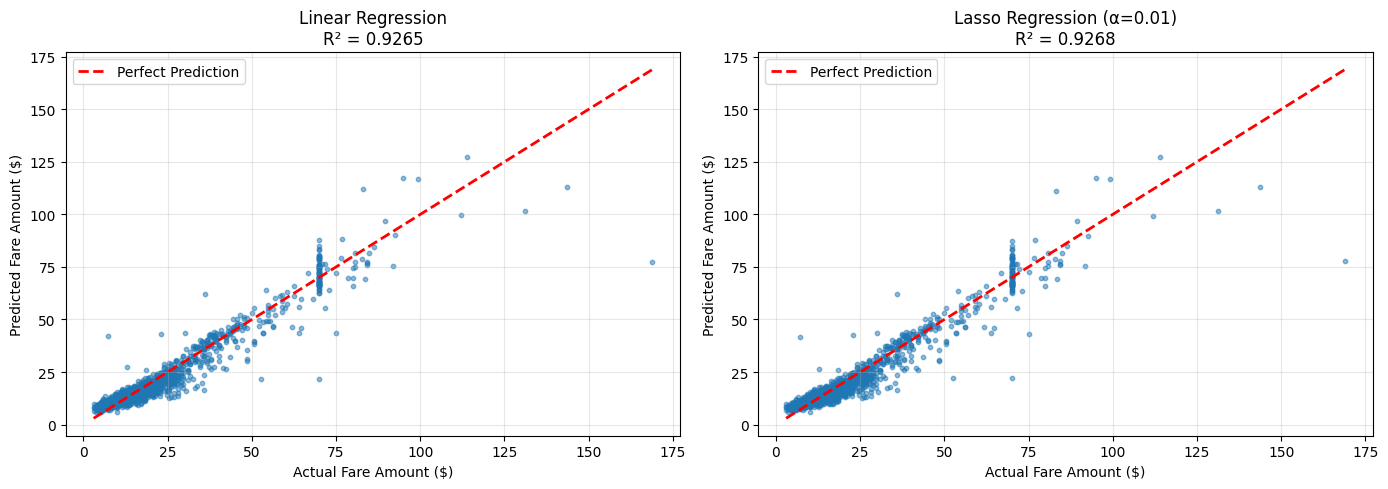

✓ Figure saved: results/figures/fare_prediction/test_predictions.png


In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression
axes[0].scatter(y_test_fare, y_pred_lr_fare, alpha=0.5, s=10)
axes[0].plot([y_test_fare.min(), y_test_fare.max()], 
             [y_test_fare.min(), y_test_fare.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Fare Amount ($)')
axes[0].set_ylabel('Predicted Fare Amount ($)')
axes[0].set_title(f'Linear Regression\nR² = {r2_lr_fare:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Lasso Regression
axes[1].scatter(y_test_fare, y_pred_lasso_fare, alpha=0.5, s=10)
axes[1].plot([y_test_fare.min(), y_test_fare.max()], 
             [y_test_fare.min(), y_test_fare.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Fare Amount ($)')
axes[1].set_ylabel('Predicted Fare Amount ($)')
axes[1].set_title(f'Lasso Regression (α={lasso_fare.named_steps["regressor"].alpha})\nR² = {r2_lasso_fare:.4f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/figures/fare_prediction/test_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure saved: results/figures/fare_prediction/test_predictions.png")

### Cell 9: Summary Report

In [18]:
print("="*80)
print("FINAL TEST RESULTS SUMMARY")
print("="*80)

print("\nTIP AMOUNT PREDICTION:")
print(f"  Best Model: {'Lasso' if r2_lasso > r2_lr else 'Linear Regression'}")
print(f"  Best R²: {max(r2_lr, r2_lasso):.4f}")
print(f"  Best RMSE: ${min(rmse_lr, rmse_lasso):.2f}")

print("\nFARE AMOUNT PREDICTION:")
print(f"  Best Model: {'Lasso' if r2_lasso_fare > r2_lr_fare else 'Linear Regression'}")
print(f"  Best R²: {max(r2_lr_fare, r2_lasso_fare):.4f}")
print(f"  Best RMSE: ${min(rmse_lr_fare, rmse_lasso_fare):.2f}")

print("\n" + "="*80)
print("TEST EVALUATION COMPLETE")
print("="*80)

FINAL TEST RESULTS SUMMARY

TIP AMOUNT PREDICTION:
  Best Model: Lasso
  Best R²: 0.5645
  Best RMSE: $2.54

FARE AMOUNT PREDICTION:
  Best Model: Lasso
  Best R²: 0.9268
  Best RMSE: $4.82

TEST EVALUATION COMPLETE
